# SpeechRecognition

## 0.Introducción al Reconocimiento de Voz con Python

El reconocimiento de voz es una tecnología que permite convertir el habla en texto de forma automática. En este notebook, exploraremos cómo podemos implementar esta funcionalidad utilizando Python y algunas de sus bibliotecas especializadas. 

### ¿Qué es el reconocimiento de voz?
El reconocimiento de voz es el proceso mediante el cual un sistema informático interpreta y transcribe el lenguaje hablado. Esto tiene aplicaciones en asistentes virtuales, transcripción de audio, sistemas de control por voz y más.

### Objetivos del Notebook
- **Comprender el funcionamiento básico:** Conocer cómo se procesa el audio y se convierte en texto.
- **Aprender a utilizar bibliotecas:** Trabajar con librerías como SpeechRecognition y PyAudio para capturar y procesar el audio.
- **Aplicaciones prácticas:** Ver ejemplos reales de cómo implementar y ajustar un sistema de reconocimiento de voz en Python.

A lo largo del notebook, abordaremos desde la instalación y configuración del entorno, pasando por ejemplos básicos de reconocimiento, hasta ejercicios prácticos que os permitirán experimentar y profundizar en el tema.


## 1. Introducción Teórica

El reconocimiento de voz es una tecnología fascinante que ha evolucionado enormemente en las últimas décadas. Antes de adentrarnos en la práctica, es útil conocer algunos conceptos básicos y los hitos que han marcado su desarrollo:

### Conceptos Básicos
- **Procesamiento de Señales:** Se refiere a cómo se captura y transforma el audio en datos que el ordenador puede analizar.
- **Modelos Acústicos y de Lenguaje:** Son fundamentales para que el sistema entienda y transcriba el habla, permitiendo convertir sonidos en palabras.

### Hitos Importantes
- **Primeros Sistemas de Reconocimiento:** En los años 50 y 60 se realizaron los primeros experimentos en reconocimiento de voz. Estos sistemas pioneros sentaron las bases para lo que vendría. [Más información](https://en.wikipedia.org/wiki/Speech_recognition).
- **Introducción de Modelos Ocultos de Markov (HMM):** Durante las décadas siguientes, los HMM revolucionaron el campo, mejorando la precisión del reconocimiento. [Descubre cómo](https://en.wikipedia.org/wiki/Hidden_Markov_model).
- **Avances con Deep Learning:** En tiempos recientes, el uso de redes neuronales profundas ha permitido alcanzar niveles de precisión y eficiencia sin precedentes. [Lee sobre el impacto del deep learning](https://en.wikipedia.org/wiki/Deep_learning).

Con estos conceptos y hitos, se sienta el escenario para entender cómo el reconocimiento de voz ha pasado de ser una idea experimental a una herramienta clave en diversas aplicaciones modernas.


## 2.Instalación y Configuración del Entorno


Antes de arrancar, aseguraos de tener instaladas estas dependencias:

- **[SpeechRecognition](https://pypi.org/project/SpeechRecognition/):** La biblioteca principal para reconocimiento de voz en Python.
  - *Alternativas:* Podéis probar con [PocketSphinx](https://pypi.org/project/pocketsphinx/) para reconocimiento offline o [Google Cloud Speech](https://pypi.org/project/google-cloud-speech/) si queréis usar la nube.
- **[PyAudio](https://pypi.org/project/PyAudio/):** Para acceder al micrófono y trabajar con audio en tiempo real.
  - *Alternativa:* Si tenéis líos con PyAudio, podéis usar [SoundDevice](https://pypi.org/project/sounddevice/) junto a [Wavio](https://pypi.org/project/wavio/) para capturar audio.

Instaladlas con:


In [ ]:
!pip install SpeechRecognition pyaudio simpleaudio


Para comprobar que funcionan y para el resto del notebook podemos importarlas

In [ ]:
import speech_recognition as sr # Usaremos la pyaudio para abrir el microfono
import simpleaudio as sa  # Usaremos simpleaudio para reproducir el audio
import os 

## 3.Primeros Pasos: Reconocimiento Básico de Voz


### 3.1 Abrir el microfono

En esta sección vamos a abrir el micrófono, grabar lo que se diga y luego reproducir la grabación. El siguiente código muestra cómo hacerlo:


Lo primero es buscar un micrófono de nuestro ordenador para poder reconocer la voz 

In [ ]:
# Creamos un reconocedor de voz
r = sr.Recognizer()

Una vez reconocido podemos escuchar audio a través del micrófono y guardarlo en una variable para que lo podamos usarlo más tarde. Es muy importante tener en cuenta el ruido ambiental por lo que deberemos ajustar nuestro microfono a este.

In [ ]:
# Iniciar la captura del micrófono
with sr.Microphone() as source:
    # Ajustar el recognizer al ruido ambiental
    r.adjust_for_ambient_noise(source)
    # Guardar el nivel de ruido (umbral de energía) en una variable
    nivel_ruido = r.energy_threshold
    print("Nivel de ruido ambiental calibrado:", nivel_ruido)

    print("¡Di algo!")
    audio = r.listen(source)

### 3.2 Guardar audio y reproducción de audio


Primero tenemos que seleccionar donde se van a guardar la carpeta

In [ ]:
# Nombre de la carpeta
folder = "media/audio"

# Verifica si la carpeta no existe; si no existe, la crea
if not os.path.exists(folder):
    os.makedirs(folder)


Luego podemos guardar audio en los siguientes formatos RAW, WAW, AIFF, FLAC

In [ ]:
# Guardar audio en un archivo RAW
raw_path = os.path.join(folder, "microphone-results.raw")
with open(raw_path, "wb") as f:
    f.write(audio.get_raw_data())
print(f"Grabación guardada en '{raw_path}'.")

# Guardar audio en un archivo WAV
wav_path = os.path.join(folder, "microphone-results.wav")
with open(wav_path, "wb") as f:
    f.write(audio.get_wav_data())
print(f"Grabación guardada en '{wav_path}'.")

# Guardar audio en un archivo AIFF
aiff_path = os.path.join(folder, "microphone-results.aiff")
with open(aiff_path, "wb") as f:
    f.write(audio.get_aiff_data())
print(f"Grabación guardada en '{aiff_path}'.")

# Guardar audio en un archivo FLAC
flac_path = os.path.join(folder, "microphone-results.flac")
with open(flac_path, "wb") as f:
    f.write(audio.get_flac_data())
print(f"Grabación guardada en '{flac_path}'.")


Una vez guardado el archivo podemos reproducirlo de la siguiente forma

In [ ]:
# Reproducimos el audio grabado
wave_obj = sa.WaveObject.from_wave_file("media/audio/microphone-results.wav")  # Cargamos el archivo WAV
play_obj = wave_obj.play()  # Iniciamos la reproducción
play_obj.wait_done()  # Esperamos a que termine la reproducción

Una vez guardado el audio se puede cargar de nuevo en memoria por si lo necesitasemos

In [ ]:
from pathlib import Path

# Usamos el directorio actual de trabajo
base_dir = Path.cwd()
audio_path = base_dir / "media" / "audio" / "microphone-results.wav"

# Verificamos que el archivo existe
if not audio_path.exists():
    raise FileNotFoundError(f"No se encontró el archivo de audio en: {audio_path}")

# Inicializamos el reconocedor
r = sr.Recognizer()

# Abrimos el archivo de audio y lo convertimos a datos que puedan procesarse
with sr.AudioFile(str(audio_path)) as source:
    audio = r.record(source)  # Leemos todo el archivo

## 4.Análisis y Procesamiento Adicional

### 4.1 Transcripción de Audio con Sphinx (Modo Offline)

En este apartado se explica el uso de Sphinx para la transcripción de audio sin necesidad de conexión a internet. La estrategia consiste en intentar convertir el audio a texto mediante el método `recognize_sphinx()`, complementado con la gestión de errores mediante bloques `try/except`. Esto permite cubrir situaciones en las que Sphinx no logra interpretar el audio o se presenta algún problema durante la solicitud. 

Aunque trabajar de forma offline es ideal para entornos sin conectividad, es importante tener en cuenta que Sphinx suele ser menos preciso que las alternativas online. Para profundizar en el tema, se puede consultar el repositorio oficial de [PocketSphinx](https://github.com/cmusphinx/pocketsphinx), el cual ofrece más detalles y recursos sobre esta tecnología.


In [ ]:
# Intentamos transcribir el audio usando Sphinx (offline)
try:
    transcription = r.recognize_sphinx(audio)
    print("Sphinx piensa que dijiste: " + transcription)
except sr.UnknownValueError:
    print("Sphinx no pudo entender el audio")
except sr.RequestError as e:
    print("Error al solicitar resultados de Sphinx; {0}".format(e))

### 4.2. Reconocimiento de Voz con Google Speech Recognition (Modo Online)

Ahora se detalla el uso de Google Speech Recognition para convertir audio en texto. Este método, a diferencia de las alternativas offline, requiere conexión a internet, ya que envía el audio capturado a los servidores de Google para su procesamiento. La ventaja principal es su alta precisión, gracias a los potentes algoritmos y recursos computacionales de Google, lo que suele traducirse en un reconocimiento más exacto y robusto del habla.

Sin embargo, es importante considerar algunas limitaciones de este enfoque:

- **Dependencia de la Conexión a Internet:** Al requerir conexión online, la funcionalidad se ve afectada en entornos sin acceso a la red, lo que puede limitar su uso en aplicaciones móviles o zonas con conectividad inestable.
- **Latencia:** El envío y procesamiento del audio en la nube puede introducir una pequeña demora en el reconocimiento, lo cual podría ser relevante en aplicaciones en tiempo real.
- **Límites y Costos:** Aunque se puede usar gratuitamente para pruebas y aplicaciones de bajo volumen, para un uso intensivo o comercial podría requerirse una suscripción o el uso de una clave de API específica.

En resumen, Google Speech Recognition es una herramienta poderosa para la transcripción de audio con alta precisión, pero su dependencia de una conexión a internet y otros factores deben sopesarse según el contexto de la aplicación.


In [ ]:
# Intentamos reconocer el habla utilizando el servicio de Google Speech Recognition
try:
    # Se llama a recognize_google con el audio capturado y se especifica 'es-ES' para el idioma español
    texto = r.recognize_google(audio, language='es-ES')
    # Si se reconoce el audio, se imprime el texto transcrito
    print("Google Speech Recognition cree que dijiste:", texto)
except sr.UnknownValueError:
    # Esta excepción se captura cuando el servicio no logra interpretar el audio
    print("Google Speech Recognition no pudo entender el audio")
except sr.RequestError as e:
    # Esta excepción se maneja en caso de errores en la solicitud (ej. problemas de conectividad)
    print("No se pudieron solicitar resultados del servicio de Google Speech Recognition; {0}".format(e))

### 4.3. Reconocimiento de Voz con WIT.ai (Modo Online)

Wit.ai es una plataforma que permite integrar capacidades de procesamiento del lenguaje natural y reconocimiento de voz en tus aplicaciones de forma remota. Utilizando el servicio de Wit.ai, se envía el audio capturado a sus servidores, donde se procesa y se devuelve una transcripción en texto. Para que este proceso funcione, es imprescindible contar con un token de autenticación, el cual se obtiene al crear y configurar tu aplicación en Wit.ai (más información en [Wit.ai](https://wit.ai/)). 

En la implementación típica, se trata de transmitir el audio capturado a través de una función que maneja dicha comunicación. Si el servicio interpreta correctamente el mensaje, se devuelve el texto correspondiente; en caso contrario, se gestionan dos tipos de excepciones:
- Una excepción para el caso en que el audio no pueda ser interpretado.
- Otra para errores de solicitud, que suelen estar relacionados con problemas de conectividad o de configuración de la API.

Este enfoque, al estar basado en un servicio online, depende de una conexión activa a Internet y de la correcta configuración de la API key. Aunque ofrece la ventaja de aprovechar algoritmos robustos para el procesamiento del lenguaje, sus limitaciones radican en la latencia potencial y en las implicaciones de privacidad, ya que se envía el audio a servidores externos para su análisis. La forma de conseguir la api aki se muestra en las siguientes capturas para que funcione tienes que usar el server access token


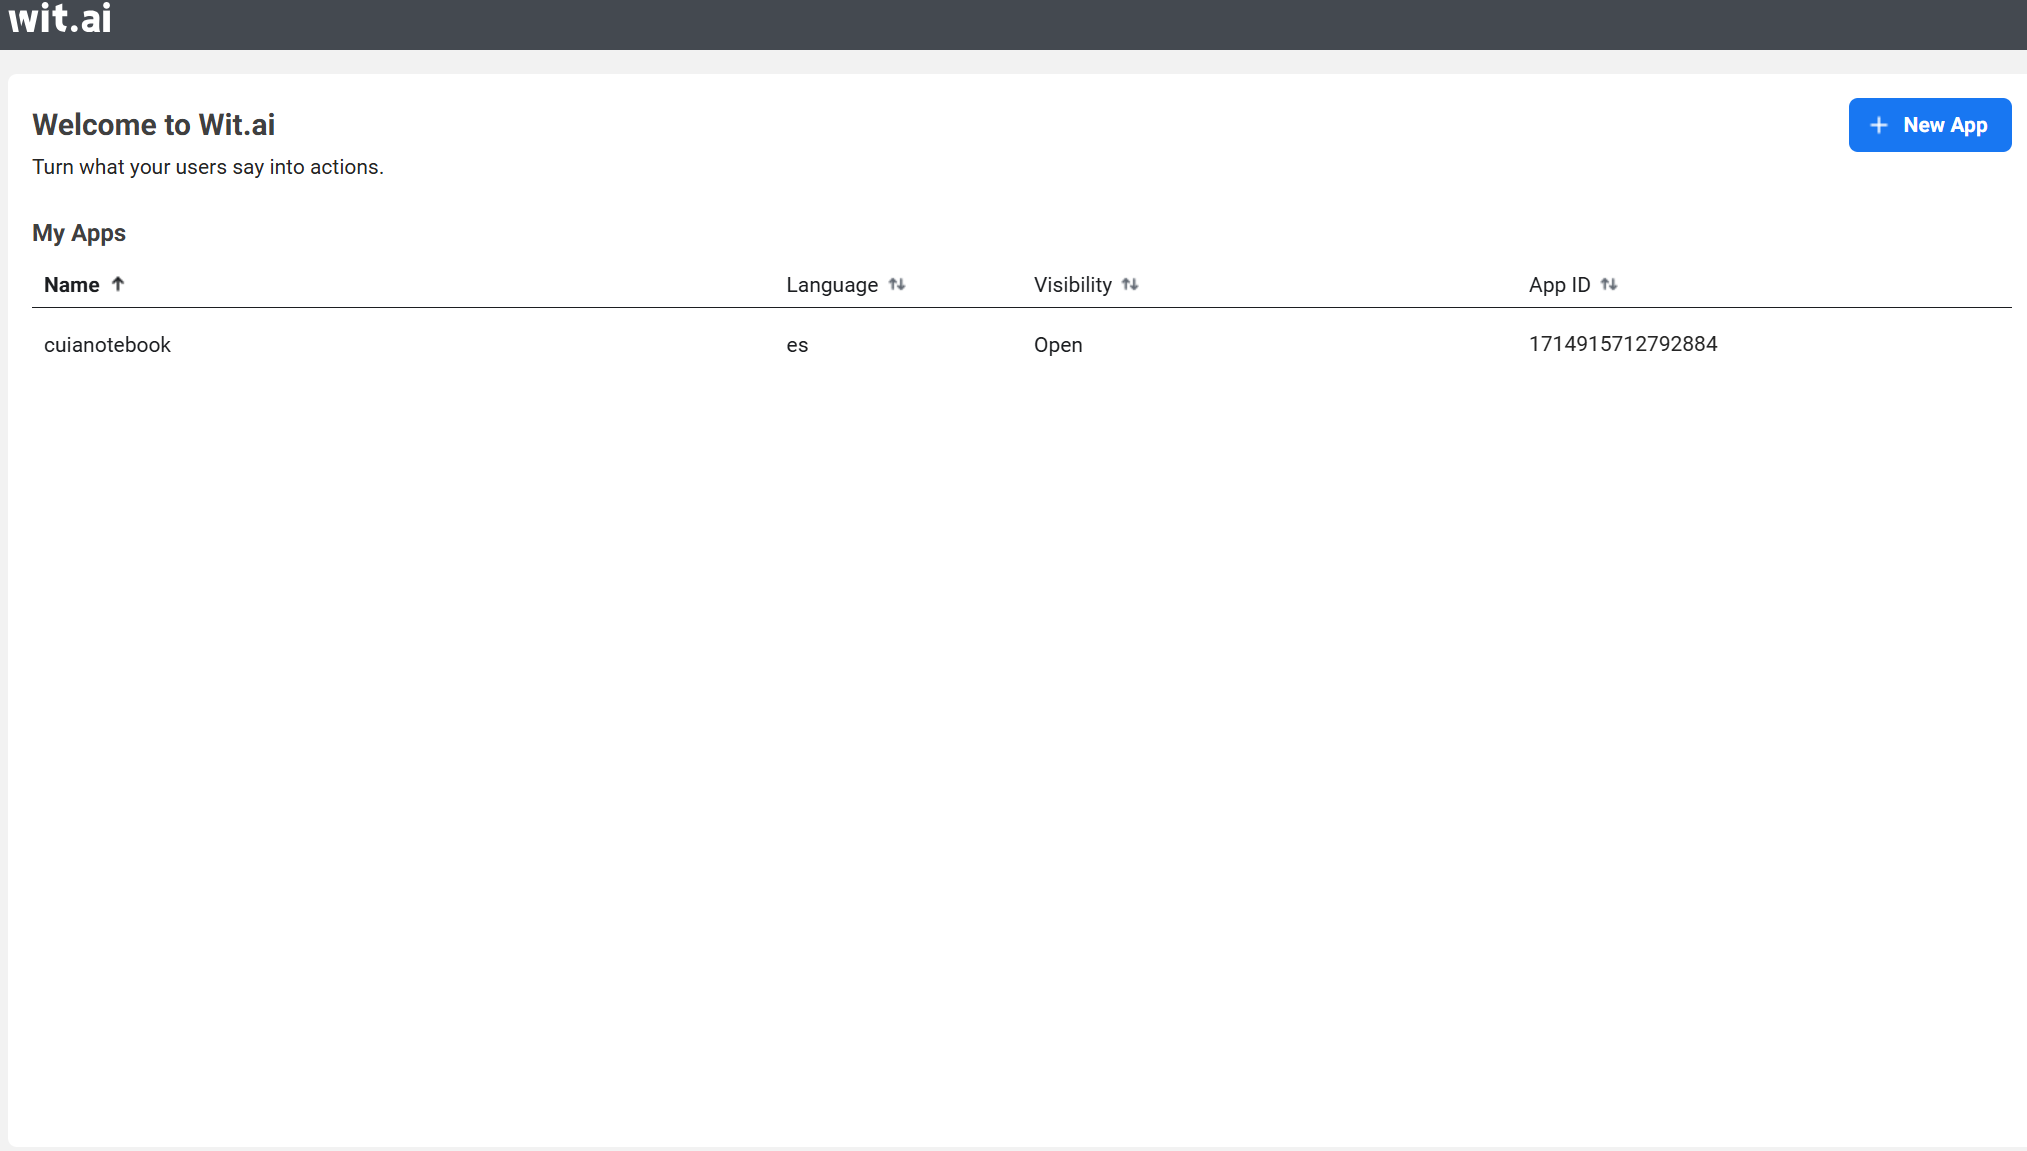

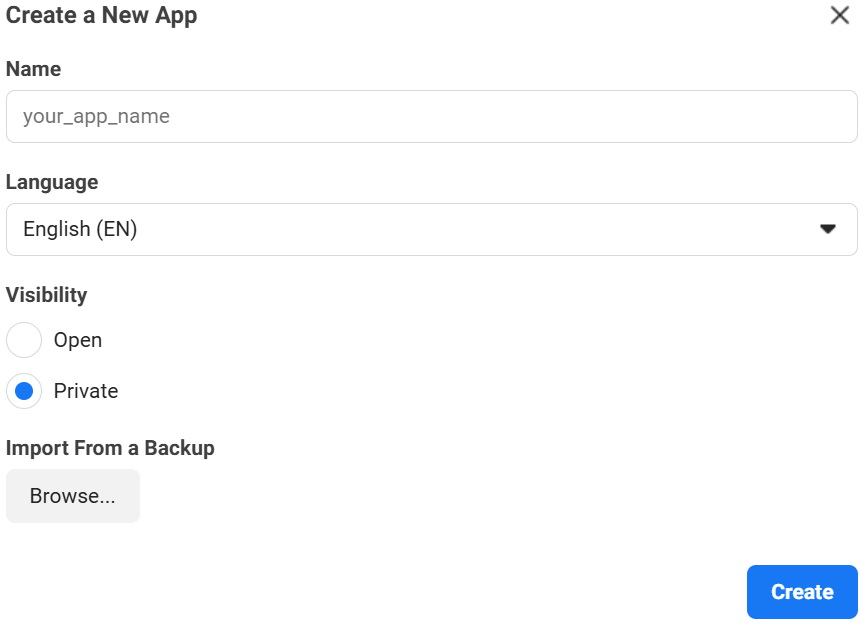

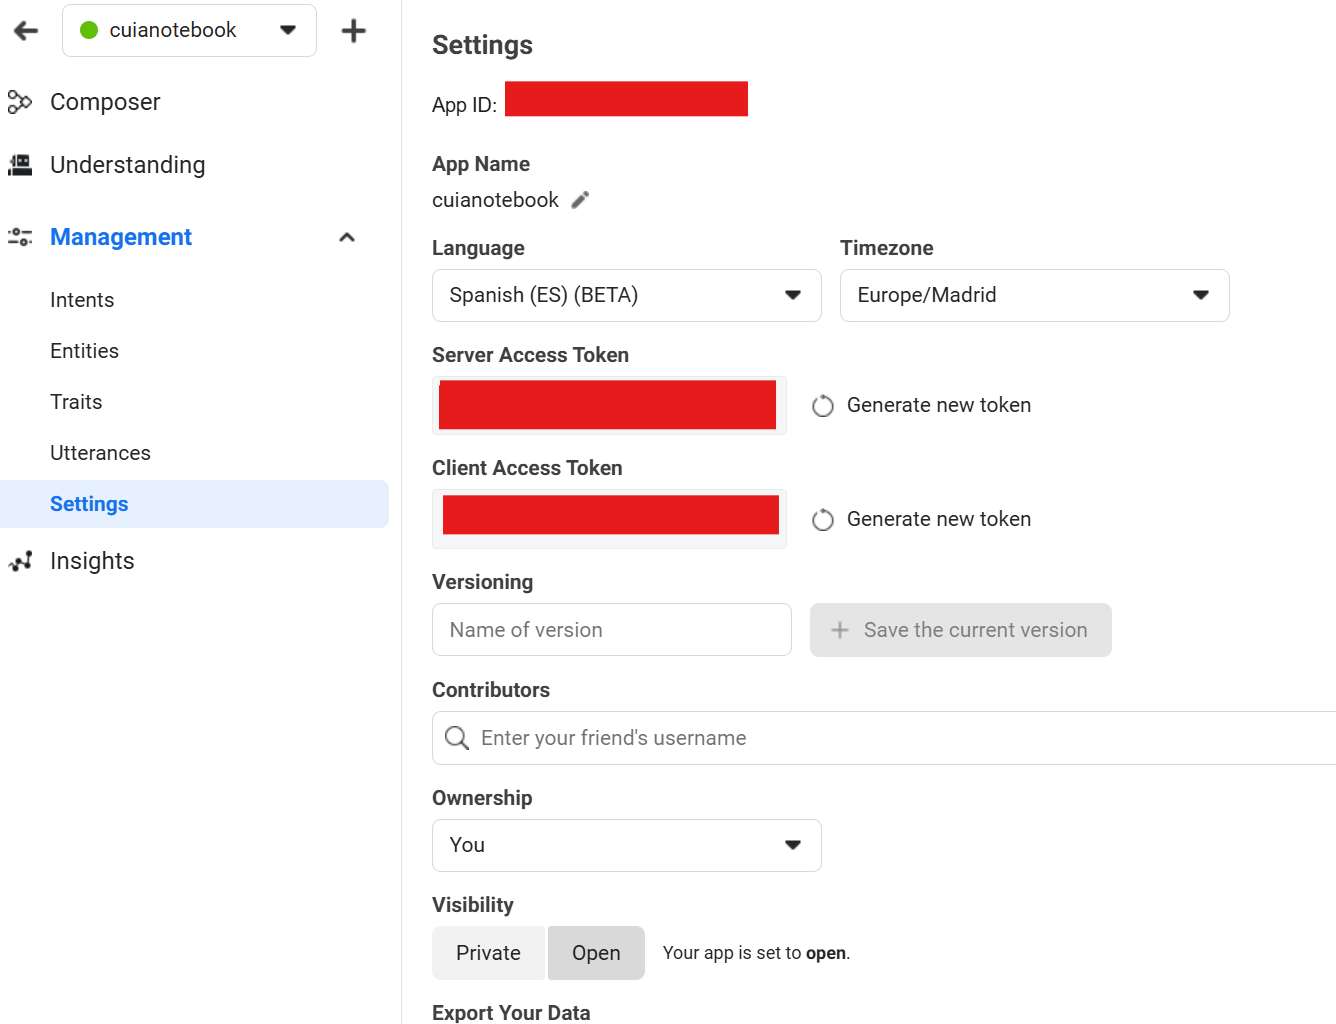

In [ ]:
# Intentamos reconocer el habla utilizando el servicio de Wit.ai
try:
    # Se llama a recognize_wit con el audio capturado y se pasa la clave de API correspondiente
    texto = r.recognize_wit(audio, key="TU CLAVE API")
    # Si se reconoce el audio, se imprime el texto transcrito
    print("Wit.ai cree que dijiste:", texto)
except sr.UnknownValueError:
    # Esta excepción se captura cuando el servicio no logra interpretar el audio
    print("Wit.ai no pudo entender el audio")
except sr.RequestError as e:
    # Esta excepción se maneja en caso de errores en la solicitud (por ejemplo, problemas de conectividad o con la API)
    print("No se pudieron solicitar resultados del servicio de Wit.ai; {0}".format(e))


### 4.4. Uso de Vosk para el Reconocimiento de Voz (Offline)

Vosk es una herramienta poderosa para el reconocimiento de voz que destaca por su capacidad para funcionar de manera offline. A diferencia de otros servicios que dependen de una conexión a internet, Vosk utiliza modelos preentrenados que se descargan y se ejecutan localmente, lo que resulta ideal para aplicaciones que requieren procesamiento en tiempo real o que operan en entornos con conectividad limitada. Gracias a esta característica, Vosk ofrece una solución robusta y rápida para la transcripción de audio en múltiples idiomas. Para comenzar a trabajar con Vosk, es necesario descargar los modelos adecuados, los cuales se encuentran disponibles en [este enlace](https://alphacephei.com/vosk/models). Esta flexibilidad y autonomía en el procesamiento hacen de Vosk una opción muy útil en el desarrollo de aplicaciones que requieren reconocimiento de voz sin depender de servicios externos. Es necesario un equipo con una gran cantidad de memoria para usarlos. Se recomienda usar o wit.ai o google speech debido que no se espara que lleguemos a los límites de la cuota gratuita.

## 5. Caso Práctico


Este script captura audio del micrófono y transcribirlo en tiempo real utilizando el servicio en línea de Google Speech Recognition. A continuación se describe en detalle lo que se hace:

1. **Calibración del Micrófono:**  
   Al inicio, se configura el objeto `Recognizer` y se selecciona el micrófono a través del objeto `Microphone`. Con el método `adjust_for_ambient_noise()`, el script calibra el nivel de ruido ambiental para optimizar el reconocimiento de voz. Esto permite que el sistema distinga de manera más precisa entre el habla y el ruido de fondo.

2. **Escucha en Segundo Plano:**  
   Se inicia la escucha de forma continua mediante el método `listen_in_background()`, el cual ejecuta una función callback cada vez que se recibe un fragmento de audio. Esta metodología permite procesar el audio sin bloquear la ejecución principal del programa, facilitando un reconocimiento en tiempo real.

3. **Función Callback:**  
   La función callback es el núcleo del proceso. Cada vez que se recibe audio, esta función:
   - Envía el audio al servicio de Google Speech Recognition para que sea transcrito a texto.
   - Imprime en pantalla el resultado de la transcripción.
   - Verifica si el texto contiene la palabra "salir". Si se detecta este comando, se activa una bandera (`exit_flag`) que se utiliza para detener el proceso de escucha.

4. **Bucle Principal y Finalización:**  
   El script mantiene un bucle principal que ejecuta continuamente una pausa corta para evitar un uso excesivo de recursos del CPU. Este bucle se mantiene activo hasta que se detecta la palabra "salir" en la transcripción, momento en el cual se detiene la escucha en segundo plano y se finaliza la ejecución del programa.

En resumen, el código permite una transcripción continua de lo que se dice en el micrófono, utilizando Google Speech Recognition para procesar el audio en línea. Además, integra un mecanismo para detener la transcripción de manera interactiva al detectar un comando específico ("salir"), haciendo el proceso dinámico y controlable por el usuario.


Este código puede ser una buena base para el reconocimiento de voz que teneis que hacer en las prácticas. Espero qeu os haya sido de ayuda y muchas gracias por seguir hasta aquí. Mucha suerte ;)

In [ ]:
import time

# Bandera global para detener la escucha cuando se detecta el comando "salir"
exit_flag = False

# Función callback que se ejecuta cada vez que se recibe audio en segundo plano
def callback(recognizer, audio):
    global exit_flag
    try:
        # Transcribir el audio usando el servicio online de Google Speech Recognition en español
        text = recognizer.recognize_google(audio, language="es-ES")
        print("\nGoogle Speech Recognition cree que dijiste:", text)
        
        # Si se detecta el comando "salir", se activa la bandera para finalizar la escucha
        if "salir" in text.lower():
            print("Se ha detectado el comando para salir. Terminando...")
            exit_flag = True

    except sr.UnknownValueError:
        # Manejo de error cuando el servicio no entiende el audio
        print("Google Speech Recognition no pudo entender el audio")
    except sr.RequestError as e:
        # Manejo de error cuando hay problemas en la solicitud, como la falta de conectividad
        print("No se pudieron solicitar resultados del servicio de Google Speech Recognition; {0}".format(e))

# Crear el objeto Recognizer y configurar el Microphone
r = sr.Recognizer()
m = sr.Microphone()

# Calibrar el recognizer al ruido ambiental para una mejor detección
with m as source:
    r.adjust_for_ambient_noise(source)
    print("Calibración completada. Escuchando de forma continua...")

# Iniciar la escucha en segundo plano de manera continua
stop_listening = r.listen_in_background(m, callback)

# Bucle principal que mantiene el script en ejecución hasta que se detecte "salir"
while not exit_flag:
    # Pausa breve para evitar uso excesivo de CPU
    time.sleep(0.1)

# Detener la escucha en segundo plano y finalizar el script
stop_listening()
print("Finalizando la escucha en segundo plano.")


## 6. Pasos extras 

### 6.1. Detección del idioma
Una función adicional que se puede implementar en proyectos de reconocimiento de voz es la detección automática de idioma. Esto resulta particularmente útil cuando se esperan entradas de voz en múltiples lenguajes o cuando la aplicación debe adaptarse dinámicamente al idioma que habla el usuario. Algunas bibliotecas de reconocimiento de voz y servicios de procesamiento en la nube ofrecen la posibilidad de identificar el idioma antes de transcribirlo. Esta capacidad facilita la creación de soluciones más versátiles, por ejemplo, aplicaciones de traducción en tiempo real, asistencia virtual multilingüe y sistemas de transcripción internacional.

### 6.2. Consideraciones de memoria y uso de hilos
Aunque el reconocimiento de voz resulta muy potente y abre múltiples posibilidades, también implica un consumo significativo de recursos del sistema, especialmente de memoria y poder de cómputo. A medida que aumentan las demandas de procesamiento (por ejemplo, si reconoces varios idiomas, aplicas modelos de gran tamaño o procesas audio en tiempo real), es probable que debas optimizar el uso de memoria y la velocidad de ejecución. En estos casos, resulta aconsejable configurar hilos o procesos adicionales que trabajen en paralelo para distribuir la carga de trabajo y aprovechar al máximo el hardware disponible. El uso eficiente de hebras (threads) o procesos puede marcar la diferencia en aplicaciones de realidad aumentada o entornos donde se requiera una respuesta rápida y en tiempo real.